# Seattle Airbnb Analysis
6 steps of CRISP-DM (Cross-Industry Standard Process for Data Mining):
1. Business Understanding : What questions are you trying to answer? 
1. Data Understanding : The necessary data to answer the questions you've defined.
1. Data Preparation : Data cleaning and preprocessing
1. Modelling : Build models or perform analyses to answer your defined questions
1. Evaluation : Evaluate the results
1. Deployment : Deployment involves sharing insights with relevant stakeholders

# 1. Business Understanding
Since its inception in 2008, Airbnb has revolutionized travel, fostering personalized journeys worldwide. Through comprehensive data analysis of its vast array of listings, the company gains valuable insights. This data-driven approach informs security measures, business strategies, customer and host behavior comprehension, marketing efforts, and innovative service expansions.

In this project, we are going to use **calendar.csv** and **listings.csv** to answer 3 business questions:
1. Which is the most busiest time in Settle?
1. Where is the most crowdest in Settle?
1. Price Prediction.

# 2. Data Understanding
**The Seattle Airbnb** Open Dataset offers insights into Seattle's homestay listings between January 2016 and January 2017. It encompasses three subsets:


There are 3 subsets in the dataset:
1. **calendar.csv**: This subset delineates listing prices for specific days.
1. **listings.csv**: Providing comprehensive details about each listing, including review scores.
1. **reviews.csv**: Offering in-depth reviews for individual listings.

Before delving into analysis, we must initiate by importing relevant data and essential libraries.

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
pd.options.mode.chained_assignment = None

In [61]:
calendar = pd.read_csv('/Users/tintran/Documents/9.Udacity Course/002.Data Science/Data/calendar.csv')
listings = pd.read_csv('/Users/tintran/Documents/9.Udacity Course/002.Data Science/Data/listings.csv')

In [62]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [63]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [64]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [65]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

# 3. Prepare Data
## Exploring the calendar.csv

In this section, we'll take a closer look at the **calendar.csv** dataset. It consists of 4 columns.

We'll start by addressing data types. The **listing_id** and **price** columns require corrections: **listing_id** to string and **price** to float.

Moreover, we'll extract useful information such as **month** and **month_year** from the **date** column.

In [66]:
calendar['listing_id'] = calendar['listing_id'].astype(str)
calendar['month'] = pd.DatetimeIndex(calendar['date']).month
calendar['year'] = pd.DatetimeIndex(calendar['date']).year
calendar['month_year'] = pd.to_datetime(calendar['date']).dt.to_period('M')
calendar['price'] = calendar['price'].apply(lambda x: float((x[1:].replace(',',''))) if type(x) != float else x)

calendar.head(10)

,listing_id,date,available,price,month,year,month_year
0,241032,2016-01-04,t,85.0,1,2016,2016-01
1,241032,2016-01-05,t,85.0,1,2016,2016-01
2,241032,2016-01-06,f,NaN,1,2016,2016-01
3,241032,2016-01-07,f,NaN,1,2016,2016-01
4,241032,2016-01-08,f,NaN,1,2016,2016-01
5,241032,2016-01-09,f,NaN,1,2016,2016-01
6,241032,2016-01-10,f,NaN,1,2016,2016-01
7,241032,2016-01-11,f,NaN,1,2016,2016-01
8,241032,2016-01-12,f,NaN,1,2016,2016-01
9,241032,2016-01-13,t,85.0,1,2016,2016-01


## Price prediction base on only relevant features are chosen:
**'price','accommodates','bathrooms','bedrooms','beds','weekly_price','monthly_price','cleaning_fee', 'instant_bookable','reviews_per_month','cancellation_policy'** 


In [67]:
relevant_features = ['price','accommodates','bathrooms','bedrooms','beds','weekly_price','monthly_price','cleaning_fee', 'instant_bookable','reviews_per_month','cancellation_policy']
df_list = listings[relevant_features]
df_list.head(10)

,price,accommodates,bathrooms,bedrooms,beds,weekly_price,monthly_price,cleaning_fee,instant_bookable,reviews_per_month,cancellation_policy
0,$85.00,4,1.0,1.0,1.0,NaN,NaN,NaN,f,4.07,moderate
1,$150.00,4,1.0,1.0,1.0,"$1,000.00","$3,000.00",$40.00,f,1.48,strict
2,$975.00,11,4.5,5.0,7.0,NaN,NaN,$300.00,f,1.15,strict
3,$100.00,3,1.0,0.0,2.0,$650.00,"$2,300.00",NaN,f,NaN,flexible
4,$450.00,6,2.0,3.0,3.0,NaN,NaN,$125.00,f,0.89,strict
5,$120.00,2,1.0,1.0,1.0,$800.00,NaN,$40.00,f,2.45,strict
6,$80.00,2,1.0,1.0,1.0,$575.00,NaN,NaN,f,2.46,moderate
7,$60.00,2,1.0,1.0,1.0,$360.00,NaN,$25.00,f,4.73,strict
8,$90.00,2,1.0,1.0,1.0,$500.00,"$1,700.00",NaN,f,1.22,strict
9,$150.00,4,1.0,1.0,1.0,"$1,000.00","$3,000.00",$40.00,f,1.55,strict


### Issues data need to handle in the list relevant
* String into Float for price-related
* Missing values in numberic variables
* Missing values in categorical variables

In [68]:
#Handle for string to float for price :
def clean_price(col):
    col = col.apply(lambda x: float((x[1:].replace(',',''))) if type(x) != float else x)
    return col

df_list['price'] = clean_price(df_list['price'])
df_list['weekly_price'] = clean_price(df_list['weekly_price'])
df_list['monthly_price'] = clean_price(df_list['monthly_price'])
df_list['cleaning_fee'] = clean_price(df_list['cleaning_fee'])
df_list.head(10)

,price,accommodates,bathrooms,bedrooms,beds,weekly_price,monthly_price,cleaning_fee,instant_bookable,reviews_per_month,cancellation_policy
0,85.0,4,1.0,1.0,1.0,NaN,NaN,NaN,f,4.07,moderate
1,150.0,4,1.0,1.0,1.0,1000.0,3000.0,40.0,f,1.48,strict
2,975.0,11,4.5,5.0,7.0,NaN,NaN,300.0,f,1.15,strict
3,100.0,3,1.0,0.0,2.0,650.0,2300.0,NaN,f,NaN,flexible
4,450.0,6,2.0,3.0,3.0,NaN,NaN,125.0,f,0.89,strict
5,120.0,2,1.0,1.0,1.0,800.0,NaN,40.0,f,2.45,strict
6,80.0,2,1.0,1.0,1.0,575.0,NaN,NaN,f,2.46,moderate
7,60.0,2,1.0,1.0,1.0,360.0,NaN,25.0,f,4.73,strict
8,90.0,2,1.0,1.0,1.0,500.0,1700.0,NaN,f,1.22,strict
9,150.0,4,1.0,1.0,1.0,1000.0,3000.0,40.0,f,1.55,strict


In [69]:
# Handle for missing numeric value : Handle by replace with "mean"
num_vars = df_list.select_dtypes(include=['int','float']).columns
for var in num_vars:
    df_list.loc[:,var] = df_list[var].fillna(df_list[var].mean())
df_list.isnull().sum()

price                  0
accommodates           0
bathrooms              0
bedrooms               0
beds                   0
weekly_price           0
monthly_price          0
cleaning_fee           0
instant_bookable       0
reviews_per_month      0
cancellation_policy    0
dtype: int64

In [70]:
# Handle for missing value on category :
cat_bool_vars = df_list.select_dtypes(include=['object','bool']).columns
cat_bool_vars
for var in cat_bool_vars:
    df_list = pd.concat([df_list.drop(var, axis=1), pd.get_dummies(q3[var], prefix=var, prefix_sep='_', drop_first=True)],
                         axis=1)

# 4. Modeling & Evaluation

## Q1. Which is the most busiest time in Settle?
#### Airbnb hosts have the option to set their listing's calendar for limited periods annually, while some listings remain accessible year-round except during booked periods. Pricing information is provided exclusively when the availability status is 'true'

In [71]:
check_f = calendar[(calendar['available'] == 'f') & (calendar['price'].notnull())].shape[0]
print('No.of rows with available = f and price is present is: {}  row(s)'.format(check_f))

No.of rows with available = f and price is present is: 0  row(s)


#### Select only entries with availability ('available = t') and where prices are provided for all listing_id values. With this subset of calendar.csv prepared, we can proceed to pivot the data and create relevant charts.

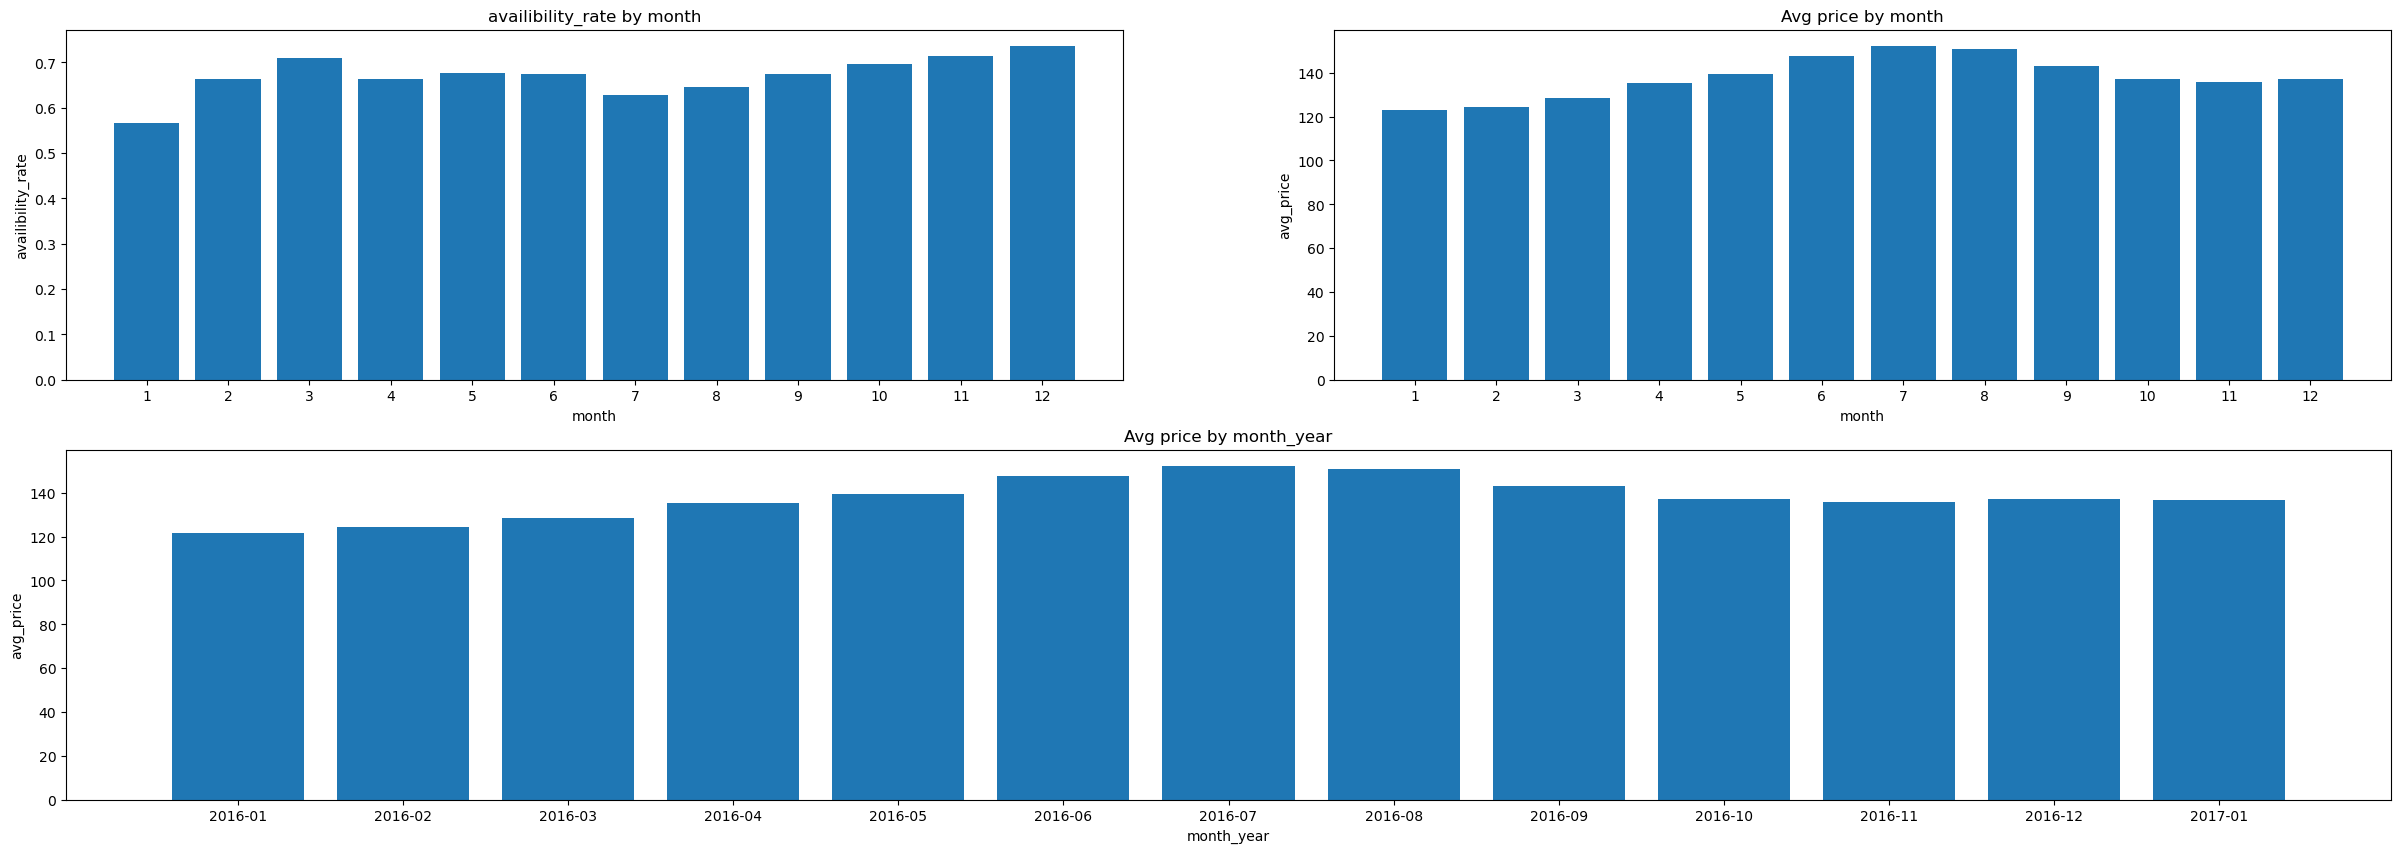

In [72]:
pivot_1 = pd.pivot_table(calendar[calendar['available'] == 't'], index='month', values=['price'], aggfunc={ 'price':np.mean})
pivot_1['month'] = pivot_1.index

pivot_2 = pd.pivot_table(calendar[calendar['available'] == 't'], index='month_year', values=['price'], aggfunc={'price':np.mean})
pivot_2['month_year'] = pivot_2.index
pivot_2['month_year'] = [str(x) for x in pivot_2['month_year']]

pivot_3 = pd.pivot_table(calendar, index='month', values=['listing_id'], columns=['available'], aggfunc={'listing_id': 'count'})
pivot_3['month'] = pivot_3.index
pivot_3['available_t'] = pivot_3.iloc[:,1]
pivot_3['available_f'] = pivot_3.iloc[:,0]

pivot_3['availibility_rate'] = pivot_3['available_t']/(pivot_3['available_t']+pivot_3['available_f'])
pivot_3 = pivot_3[['month','availibility_rate']].reset_index(drop=True)
pivot_3

plt.figure(figsize=(30, 10))
g = plt.GridSpec(2, 2) #Grid


plt.subplot(g[0,0])
plt.bar(pivot_3['month'], pivot_3['availibility_rate'])
plt.xlabel('month')
plt.xticks(pivot_3['month'])
plt.ylabel('availibility_rate')
plt.title('availibility_rate by month')


plt.subplot(g[0,1])
plt.bar(pivot_1['month'], pivot_1['price'])
plt.xlabel('month')
plt.xticks(pivot_1['month'])
plt.ylabel('avg_price')
plt.title('Avg price by month')

plt.subplot(g[1,:])
plt.bar(pivot_2['month_year'], pivot_2['price'])
plt.xlabel('month_year')
plt.xticks(pivot_2['month_year'])
plt.ylabel('avg_price')
plt.title('Avg price by month_year')

plt.show()

#### Seattle maintains busy year-round activity with consistent availability rates above 0.5. Peak demand occurs in March, November, and December (availability rate surpasses 0.7). These months align with holidays and weekends, promoting increased travel. Hosts exhibit strategic planning, offering discounts during peak guest numbers and slightly higher prices to offset less profitable periods, notably the highest prices in July.

## Q2.Where is the most crowdest in Settle?

#### Study on listings.csv to answer the 2nd question. 

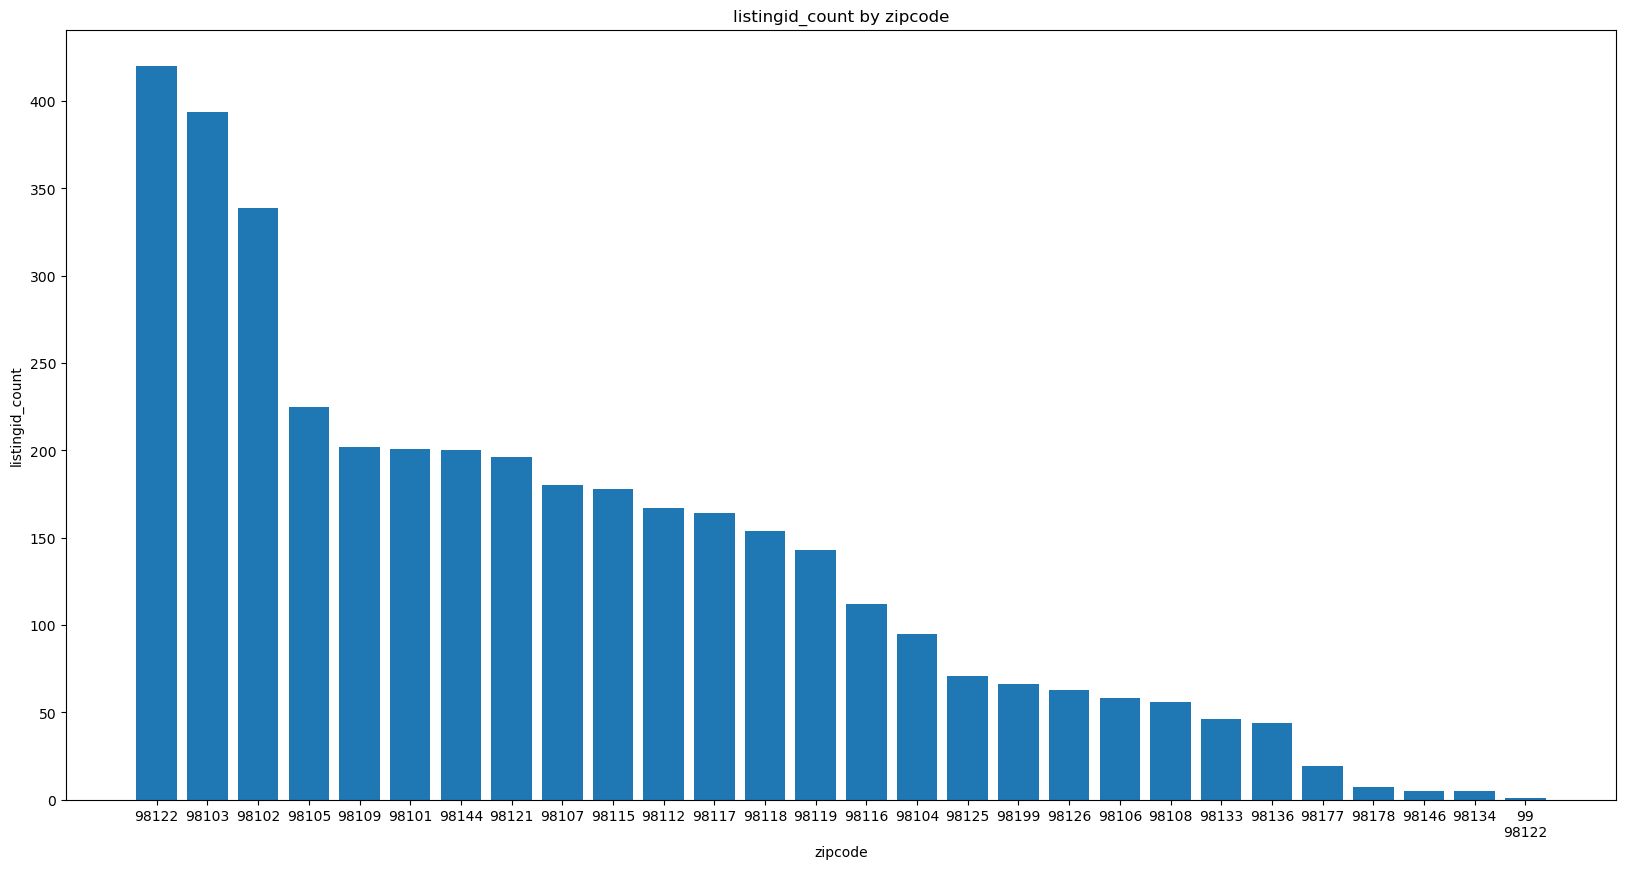

In [73]:
zip = listings['zipcode'].value_counts()
zip = zip.to_frame().reset_index()
zip = zip.rename({'index':'zipcode', 'zipcode':'listingid_count'}, axis=1)
zip['zipcode'].astype('str')


plt.figure(figsize = (20,10))
plt.bar(zip['zipcode'], zip['listingid_count'])
plt.xlabel('zipcode')
plt.xticks(zip['zipcode'])
plt.ylabel('listingid_count')
plt.title('listingid_count by zipcode')
plt.show()

In [74]:
print('Top 10 areas which have the highest number in Seattle are: ')
zip.head(10)

Top 10 areas which have the highest number in Seattle are: 


,zipcode,listingid_count
0,98122,420
1,98103,394
2,98102,339
3,98105,225
4,98109,202
5,98101,201
6,98144,200
7,98121,196
8,98107,180
9,98115,178


## Q3. Price Prediction

The correlation coefficient ranges from -1 to 1:

- A value near 0 suggests a weak association (0 indicates no correlation).
- Closer to 1 indicates a stronger positive association.
- A stronger negative correlation is indicated by a value closer to -1.

Correlation among numeric variables: 

price                           1.000000
accommodates                    0.652218
bathrooms                       0.516017
bedrooms                        0.627596
beds                            0.589306
weekly_price                    0.626361
monthly_price                   0.495664
cleaning_fee                    0.583274
reviews_per_month              -0.199620
instant_bookable_t             -0.031712
cancellation_policy_moderate   -0.102123
cancellation_policy_strict      0.226632
Name: price, dtype: float64 

Present the result in heatmap: 


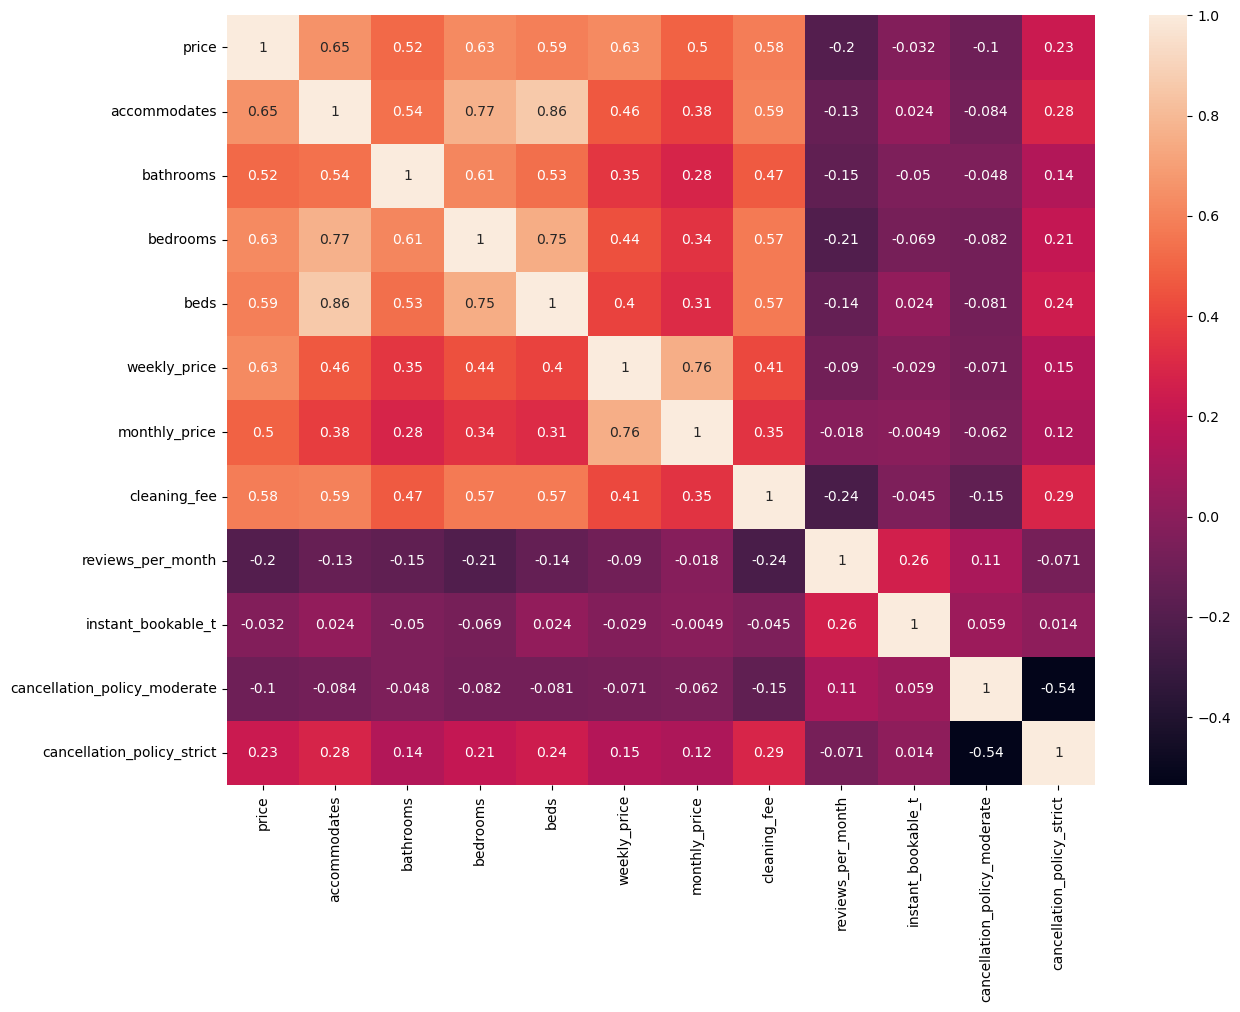

In [77]:
print('Correlation among numeric variables: \n')

plt.figure(figsize=(14, 10))
corr = df_list.corr()
print(corr['price'], '\n')

print('Present the result in heatmap: ')
sns.heatmap(corr, annot=True)
plt.show()

### Modelling

**Building a Model in 4 Steps:**

1. Create your linear model using normalized data.
2. Train the model using the training data.
3. Make predictions using the test data.
4. Evaluate the model's performance on the test set.

In [81]:
y = df_list['price']
X = df_list.drop(columns = ['price'], inplace=False)
X.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   accommodates                  3818 non-null   int64  
 1   bathrooms                     3818 non-null   float64
 2   bedrooms                      3818 non-null   float64
 3   beds                          3818 non-null   float64
 4   weekly_price                  3818 non-null   float64
 5   monthly_price                 3818 non-null   float64
 6   cleaning_fee                  3818 non-null   float64
 7   reviews_per_month             3818 non-null   float64
 8   instant_bookable_t            3818 non-null   uint8  
 9   cancellation_policy_moderate  3818 non-null   uint8  
 10  cancellation_policy_strict    3818 non-null   uint8  
dtypes: float64(7), int64(1), uint8(3)
memory usage: 249.9 KB


test_score: 0.6106924826212421
train_score: 0.6127076826643214
The model is not overfitted.
The r-squared score for the model is 0.6106924826212421 on 1146 values.

Rank features by their impact on the price:
                          feature       coef   abs_coef
4                   weekly_price  31.991915  31.991915
0                   accommodates  22.948606  22.948606
6                   cleaning_fee  16.400763  16.400763
1                      bathrooms   9.993813   9.993813
2                       bedrooms   9.463382   9.463382
7              reviews_per_month  -5.547222   5.547222
3                           beds  -3.153607   3.153607
5                  monthly_price   1.343938   1.343938
9   cancellation_policy_moderate  -0.954238   0.954238
8             instant_bookable_t   0.726938   0.726938
10    cancellation_policy_strict   0.251546   0.251546


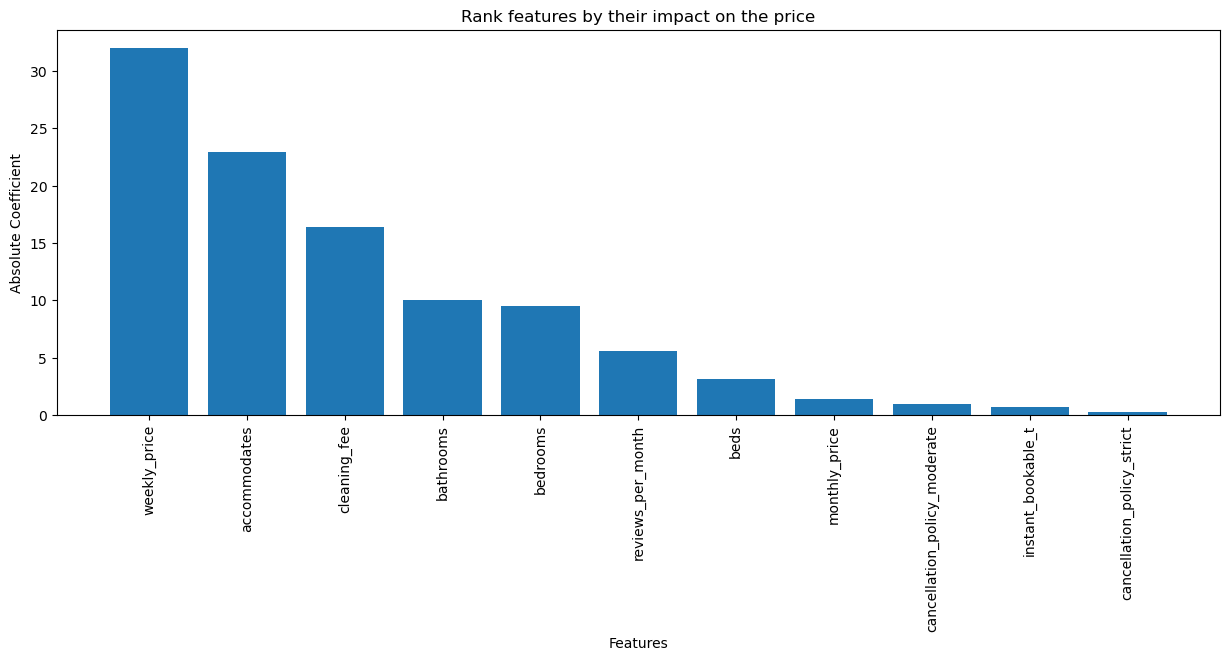

In [84]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have defined X and y

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Create and train the linear regression model
lm_model = LinearRegression()
lm_model.fit(X_train, y_train)

# Make predictions on the test set
y_test_predict = lm_model.predict(X_test)
y_train_predict = lm_model.predict(X_train)

# Calculate R-squared scores
test_score = r2_score(y_test, y_test_predict)
train_score = r2_score(y_train, y_train_predict)

print('test_score:', test_score)
print('train_score:', train_score)

# Check for overfitting
if abs(test_score / train_score) > 0.8:
    print('The model is not overfitted.')
else:
    print('Need to improve the model.')

print('The r-squared score for the model is {} on {} values.'.format(test_score, len(y_test)))

# Continue with coefficient analysis and plotting
coef_df = pd.DataFrame()
coef_df['feature'] = X.columns
coef_df['coef'] = lm_model.coef_
coef_df['abs_coef'] = np.abs(lm_model.coef_)
coef_df = coef_df.sort_values(by='abs_coef', ascending=False)

print('\nRank features by their impact on the price:\n', coef_df)

plt.figure(figsize=(15, 5))
plt.bar(coef_df['feature'], coef_df['abs_coef'])
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.ylabel('Absolute Coefficient')
plt.title('Rank features by their impact on the price')
plt.show()


## Summary
#### In general, business thrives during March, November, and December. The top 5 Seattle areas with the most Airbnb properties are: 98122, 98103, 98102, 98105, and 98109. Among the selected features, the bathroom exerts the greatest influence on the price.